##### 동물 분류

https://drive.google.com/file/d/1_d8RcCM21XneorFe_m4939erMkCnccS1/view?usp=drive_link

In [4]:
file = open('./datasets/animals/translate.py', 'r')
content = file.readline()
content = content[content.index('{'): content.index('}') + 1]
content1 = eval(content)
content2 = {v : k for k, v in content1.items()}

file.close()

print(content1, content2, sep='\n')

{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'dog': 'cane', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'spider': 'ragno', 'squirrel': 'scoiattolo'}
{'dog': 'cane', 'horse': 'cavallo', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'sheep': 'pecora', 'squirrel': 'scoiattolo', 'cane': 'dog', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'ragno': 'spider', 'scoiattolo': 'squirrel'}


In [5]:
import os
from glob import glob

root = './datasets/animals/original/'
directories = glob(os.path.join(root, '*'))
print(directories)

for directory in directories:
    try:
        os.rename(directory, os.path.join(root, content1[directory[directory.rindex('\\') + 1:]]))
    except KeyError as e:
        os.rename(directory, os.path.join(root, content2[directory[directory.rindex('\\') + 1:]]))

['./datasets/animals/original\\cane', './datasets/animals/original\\cavallo', './datasets/animals/original\\elefante', './datasets/animals/original\\farfalla', './datasets/animals/original\\gallina', './datasets/animals/original\\gatto', './datasets/animals/original\\mucca', './datasets/animals/original\\pecora', './datasets/animals/original\\ragno', './datasets/animals/original\\scoiattolo']


In [6]:
directories = glob(os.path.join(root, '*'))
print(directories)

['./datasets/animals/original\\butterfly', './datasets/animals/original\\cat', './datasets/animals/original\\chicken', './datasets/animals/original\\cow', './datasets/animals/original\\dog', './datasets/animals/original\\elephant', './datasets/animals/original\\horse', './datasets/animals/original\\sheep', './datasets/animals/original\\spider', './datasets/animals/original\\squirrel']


In [7]:
# 디렉토리 이름을 모두 가져오기(list 타입으로 변환)
directory_names = list(map(lambda directory: directory[directory.rindex("\\") + 1:], directories))
directory_names

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [8]:
# 전체 파일명을 디렉토리명과 일치하게 바꾸자!(예: dog1.png, dog2.png, ...)
# os.rename(old, new)
# 1. directory_names
# 2. os.listdir()
# os.listdir(os.path.join(root, 'dog'))    

root = './datasets/animals/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')
        
        os.rename(old_file, new_file)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 150
BATCH_SIZE = 64

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

print(generator.class_indices)

Found 26179 images belonging to 10 classes.
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [10]:
generator.classes

array([0, 0, 0, ..., 9, 9, 9])

In [11]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'butterfly',
 1: 'cat',
 2: 'chicken',
 3: 'cow',
 4: 'dog',
 5: 'elephant',
 6: 'horse',
 7: 'sheep',
 8: 'spider',
 9: 'squirrel'}

In [12]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

target_names

['butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butterfly',
 'butt

In [13]:
import pandas as pd

animal_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
animal_df.file_paths = animal_df.file_paths.apply(lambda x : x.replace('\\', '/'))
animal_df

,file_paths,target_names,targets
0,./datasets/animals/original/butterfly/butterfl...,butterfly,0
1,./datasets/animals/original/butterfly/butterfl...,butterfly,0
2,./datasets/animals/original/butterfly/butterfl...,butterfly,0
3,./datasets/animals/original/butterfly/butterfl...,butterfly,0
4,./datasets/animals/original/butterfly/butterfl...,butterfly,0
...,...,...,...
26174,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26175,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26176,./datasets/animals/original/squirrel/squirrel9...,squirrel,9
26177,./datasets/animals/original/squirrel/squirrel9...,squirrel,9


In [14]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = train_test_split(animal_df.file_paths, animal_df.targets, stratify=animal_df.targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
4    3890
8    3857
2    2478
6    2098
0    1690
3    1493
9    1490
7    1456
1    1334
5    1157
Name: count, dtype: int64
targets
4    973
8    964
2    620
6    525
0    422
3    373
9    372
7    364
1    334
5    289
Name: count, dtype: int64


In [15]:
train_train_images, validation_images, train_train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

print(train_train_targets.value_counts(), train_train_images.shape[0])
print(validation_targets.value_counts(), validation_images.shape[0])
print(test_targets.value_counts(), test_targets.shape[0])

targets
4    3112
8    3086
2    1982
6    1678
0    1352
3    1194
9    1192
7    1165
1    1067
5     926
Name: count, dtype: int64 16754
targets
4    778
8    771
2    496
6    420
0    338
3    299
9    298
7    291
1    267
5    231
Name: count, dtype: int64 4189
targets
4    973
8    964
2    620
6    525
0    422
3    373
9    372
7    364
1    334
5    289
Name: count, dtype: int64 5236


In [16]:
import shutil
import os.path

root = './datasets/animals/'

for filepath in train_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'train/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [17]:
# valid copy
import shutil
import os.path

root = './datasets/animals/'

for filepath in validation_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'validation/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [18]:
# test copy
# valid copy
import shutil
import os.path

root = './datasets/animals/'

for filepath in test_images:
#     './datasets/animals/original/butterfly/butterfly1.png'
    animal_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/') + 1]
    destination = os.path.join(root, 'test/' + animal_dir)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    shutil.copy2(filepath, destination)

In [43]:
train_df = animal_df.loc[train_train_images.index].reset_index(drop=True)
validation_df = animal_df.loc[validation_images.index].reset_index(drop=True)
test_df = animal_df.loc[test_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

16754
4189
5236


In [44]:
list_a = [1, 2, 3, 4, 5]
print(len(list_a), list_a.__len__()) # __len__(self) 호출
print(list_a[0], list_a.__getitem__(0)) # __getitem__(self, index)

5 5
1 1


In [45]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

# 배치 크기와 이미지 크기를 전역 변수로 선언 
BATCH_SIZE = 64
IMAGE_SIZE = 224


class Dataset(Sequence):
#     입력 값(file_paths, targets)은 반드시 numpy array로 전달해야 한다.
#     file_paths: 이미지 파일의 절대 경로 list
#     targets: 이미지의 타겟 데이터 list
#     batch_size: __getitem__(self, index)를 호출할 때마다 가져올 데이터 batch 건수
#     aug: 이미지 증강 객체(albumentations)
#     shuffle: epoch마다 데이터를 섞을지 여부(학습 데이터만 적용)
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.shuffle = shuffle
        
#         학습 데이터일 때
        if self.shuffle:
#             객체 생성 시 데이터를 섞고 시작 
            self.on_epoch_end()
            
#     Sequence를 상속받은 Dataset은 batch_size 단위로 입력 데이터를 처리한다.
#     __len__()은 전체 데이터 건수에서 batch_size 단위로 몇 번 데이터를 처리하는지 리턴한다.
    def __len__(self):
#         나누어 떨어지지 않으면 나머지 데이터를 위해 1번 더 가져오고 이를 위해 소수점은 모두 올려준다(np.ceil()).
        return int(np.ceil(len(self.targets)/self.batch_size))

#     batch_size 단위로 이미지 배열 list와 타겟 데이터 list를 가져온 뒤 변환한 값을 리턴한다.    
#     몇 번째 batch인지를 index로 전달받고 해당 index의 batch_size만큼 데이터들을 변환한다.
    def __getitem__(self, index):
        # 해당 인덱스의 batch_size만큼 슬라이스 인덱싱으로 file_path와 targets를 가져온다.
        file_paths_batch = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
        targets_batch = self.targets[index*self.batch_size:(index+1)*self.batch_size]
        
        # albumentations은 한 번에 이미지 한 개만 변환할 수 있기 때문에 batch_size만큼 반복하여 수행한다.
        files_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
        # opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음.
        for index in range(file_paths_batch.shape[0]):
#             opencv로 해당 경로의 이미지 불러오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[index]), cv2.COLOR_BGR2RGB)
#             원본 이미지를 모델에 맞게 Resize 진행
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            if self.aug is not None:
                image = self.aug(image=image)['image']
        
            files_batch[index] = image
       
        return files_batch, targets_batch
            
            
    # 반복(epoch)이 끝나면 모델의 fit()에서 호출된다. 
    def on_epoch_end(self):
        if(self.shuffle):
            # 이미지 데이터와 맞는 타겟 데이터를 한 쌍으로 섞어준다.
            self.file_paths, self.targets = sklearn.utils.shuffle(self.file_paths, self.targets)
        else:
            pass

In [46]:
import albumentations as A

# values를 사용하여, numpy array로 변환한다. 
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5)
])

dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, shuffle=True)

In [47]:
import numpy as np

files_batch, targets_batch = next(iter(dataset))
print(files_batch.shape, targets_batch.shape)
print(files_batch[0])

(64, 224, 224, 3) (64,)
[[[198. 194. 191.]
  [197. 193. 190.]
  [196. 192. 189.]
  ...
  [156. 136. 134.]
  [151. 131. 126.]
  [146. 125. 117.]]

 [[193. 189. 186.]
  [193. 189. 186.]
  [192. 188. 185.]
  ...
  [148. 127. 125.]
  [148. 125. 121.]
  [147. 126. 118.]]

 [[189. 185. 182.]
  [189. 185. 182.]
  [189. 185. 182.]
  ...
  [140. 116. 114.]
  [145. 120. 116.]
  [148. 127. 119.]]

 ...

 [[201. 202. 204.]
  [198. 199. 201.]
  [197. 198. 200.]
  ...
  [187. 187. 189.]
  [189. 189. 191.]
  [192. 192. 194.]]

 [[203. 204. 206.]
  [201. 202. 204.]
  [200. 201. 203.]
  ...
  [191. 191. 193.]
  [193. 193. 195.]
  [195. 195. 198.]]

 [[208. 209. 211.]
  [205. 206. 208.]
  [204. 205. 207.]
  ...
  [196. 196. 198.]
  [198. 198. 200.]
  [201. 201. 203.]]]


                      file_paths
target_names targets            
butterfly    0               422
cat          1               334
chicken      2               620
cow          3               373
dog          4               973
elephant     5               289
horse        6               525
sheep        7               364
spider       8               964
squirrel     9               372


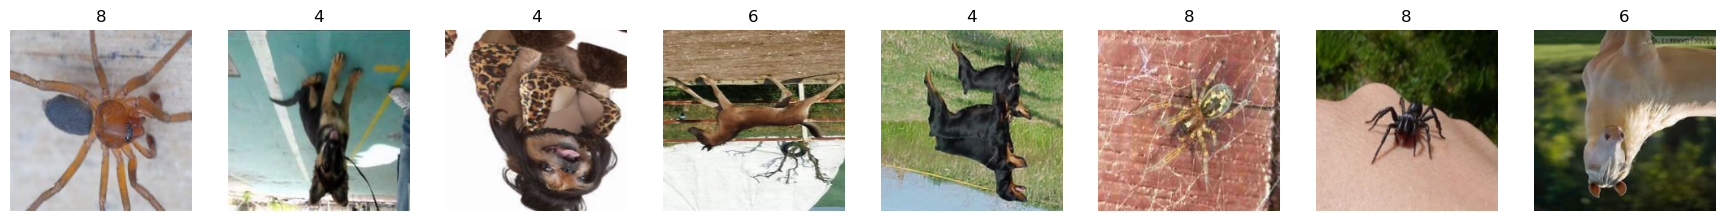

In [48]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

print(test_df.groupby(by=['target_names', 'targets']).count())
show_images(files_batch, ncols=8, title=targets_batch)

##### scaling 추가

In [49]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

# 배치 크기와 이미지 크기를 전역 변수로 선언 
BATCH_SIZE = 64
IMAGE_SIZE = 224


class Dataset(Sequence):
#     입력 값(file_paths, targets)은 반드시 numpy array로 전달해야 한다.
#     file_paths: 이미지 파일의 절대 경로 list
#     targets: 이미지의 타겟 데이터 list
#     batch_size: __getitem__(self, index)를 호출할 때마다 가져올 데이터 batch 건수
#     aug: 이미지 증강 객체(albumentations)
#     shuffle: epoch마다 데이터를 섞을지 여부(학습 데이터만 적용)
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.shuffle = shuffle
        
#         학습 데이터일 때
        if self.shuffle:
#             객체 생성 시 데이터를 섞고 시작 
            self.on_epoch_end()
            
#     Sequence를 상속받은 Dataset은 batch_size 단위로 입력 데이터를 처리한다.
#     __len__()은 전체 데이터 건수에서 batch_size 단위로 몇 번 데이터를 처리하는지 리턴한다.
    def __len__(self):
#         나누어 떨어지지 않으면 나머지 데이터를 위해 1번 더 가져오고 이를 위해 소수점은 모두 올려준다(np.ceil()).
        return int(np.ceil(len(self.targets)/self.batch_size))

#     batch_size 단위로 이미지 배열 list와 타겟 데이터 list를 가져온 뒤 변환한 값을 리턴한다.    
#     몇 번째 batch인지를 index로 전달받고 해당 index의 batch_size만큼 데이터들을 변환한다.
    def __getitem__(self, index):
        # 해당 인덱스의 batch_size만큼 슬라이스 인덱싱으로 file_path와 targets를 가져온다.
        file_paths_batch = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
        targets_batch = self.targets[index*self.batch_size:(index+1)*self.batch_size]
        
        # albumentations은 한 번에 이미지 한 개만 변환할 수 있기 때문에 batch_size만큼 반복하여 수행한다.
        files_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
        # opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음.
        for index in range(file_paths_batch.shape[0]):
#             opencv로 해당 경로의 이미지 불러오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[index]), cv2.COLOR_BGR2RGB)
#             원본 이미지를 모델에 맞게 Resize 진행
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            if self.aug is not None:
                image = self.aug(image=image)['image']
            
            image = image/255.0
            files_batch[index] = image
       
        return files_batch, targets_batch
            
            
    # 반복(epoch)이 끝나면 모델의 fit()에서 호출된다. 
    def on_epoch_end(self):
        if(self.shuffle):
            # 이미지 데이터와 맞는 타겟 데이터를 한 쌍으로 섞어준다.
            self.file_paths, self.targets = sklearn.utils.shuffle(self.file_paths, self.targets)
        else:
            pass

In [50]:
dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, shuffle=True)

images_batch, targets_batch = next(iter(dataset))
print(images_batch.shape, targets_batch.shape)
print(images_batch[0:2])

(64, 224, 224, 3) (64,)
[[[[0.59215686 0.67843137 0.98431373]
   [0.60784314 0.69803922 0.99607843]
   [0.60392157 0.69411765 0.99607843]
   ...
   [0.59215686 0.63921569 0.93333333]
   [0.59607843 0.64705882 0.92941176]
   [0.60784314 0.6627451  0.93333333]]

  [[0.60392157 0.69019608 0.98431373]
   [0.61568627 0.70588235 0.99607843]
   [0.60784314 0.69803922 0.99215686]
   ...
   [0.58039216 0.63921569 0.9372549 ]
   [0.58431373 0.64313725 0.9372549 ]
   [0.58431373 0.65098039 0.94117647]]

  [[0.58431373 0.6627451  0.96078431]
   [0.58039216 0.6745098  0.96470588]
   [0.57254902 0.66666667 0.95686275]
   ...
   [0.57254902 0.64705882 0.95686275]
   [0.57647059 0.65098039 0.96078431]
   [0.57647059 0.65098039 0.96078431]]

  ...

  [[0.30980392 0.41176471 0.15686275]
   [0.2627451  0.36078431 0.10196078]
   [0.25882353 0.35686275 0.09803922]
   ...
   [0.35294118 0.45882353 0.19215686]
   [0.30588235 0.41176471 0.14117647]
   [0.37254902 0.47843137 0.20784314]]

  [[0.2627451  0.3607

##### pretrained model의 preprocess_input  추가

In [55]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

# 배치 크기와 이미지 크기를 전역 변수로 선언 
BATCH_SIZE = 64
IMAGE_SIZE = 224


class Dataset(Sequence):
#     입력 값(file_paths, targets)은 반드시 numpy array로 전달해야 한다.
#     file_paths: 이미지 파일의 절대 경로 list
#     targets: 이미지의 타겟 데이터 list
#     batch_size: __getitem__(self, index)를 호출할 때마다 가져올 데이터 batch 건수
#     aug: 이미지 증강 객체(albumentations)
#     shuffle: epoch마다 데이터를 섞을지 여부(학습 데이터만 적용)
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, shuffle=False, preprocess=None):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.shuffle = shuffle
        self.preprocess = preprocess
        
#         학습 데이터일 때
        if self.shuffle:
#             객체 생성 시 데이터를 섞고 시작 
            self.on_epoch_end()
            
#     Sequence를 상속받은 Dataset은 batch_size 단위로 입력 데이터를 처리한다.
#     __len__()은 전체 데이터 건수에서 batch_size 단위로 몇 번 데이터를 처리하는지 리턴한다.
    def __len__(self):
#         나누어 떨어지지 않으면 나머지 데이터를 위해 1번 더 가져오고 이를 위해 소수점은 모두 올려준다(np.ceil()).
        return int(np.ceil(len(self.targets)/self.batch_size))

#     batch_size 단위로 이미지 배열 list와 타겟 데이터 list를 가져온 뒤 변환한 값을 리턴한다.    
#     몇 번째 batch인지를 index로 전달받고 해당 index의 batch_size만큼 데이터들을 변환한다.
    def __getitem__(self, index):
        # 해당 인덱스의 batch_size만큼 슬라이스 인덱싱으로 file_path와 targets를 가져온다.
        file_paths_batch = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
        targets_batch = self.targets[index*self.batch_size:(index+1)*self.batch_size]
        
        # albumentations은 한 번에 이미지 한 개만 변환할 수 있기 때문에 batch_size만큼 반복하여 수행한다.
        files_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
        # opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음.
        for index in range(file_paths_batch.shape[0]):
#             opencv로 해당 경로의 이미지 불러오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[index]), cv2.COLOR_BGR2RGB)
#             원본 이미지를 모델에 맞게 Resize 진행
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            if self.aug is not None:
                image = self.aug(image=image)['image']
            
            if self.preprocess is not None:
                image = self.preprocess(image)
                
            files_batch[index] = image
       
        return files_batch, targets_batch
            
            
    # 반복(epoch)이 끝나면 모델의 fit()에서 호출된다. 
    def on_epoch_end(self):
        if(self.shuffle):
            # 이미지 데이터와 맞는 타겟 데이터를 한 쌍으로 섞어준다.
            self.file_paths, self.targets = sklearn.utils.shuffle(self.file_paths, self.targets)
        else:
            pass

In [56]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, shuffle=True, preprocess=xception_preprocess_input)

images_batch, targets_batch = next(iter(dataset))
print(images_batch.shape, targets_batch.shape)
print(images_batch[0:2])

(64, 224, 224, 3) (64,)
[[[[ 0.05882359  0.05882359  0.05882359]
   [ 0.04313731  0.04313731  0.04313731]
   [ 0.03529418  0.03529418  0.03529418]
   ...
   [ 0.03529418  0.03529418  0.03529418]
   [ 0.03529418  0.03529418  0.03529418]
   [ 0.05098045  0.05098045  0.05098045]]

  [[ 0.04313731  0.04313731  0.04313731]
   [ 0.02745104  0.02745104  0.02745104]
   [ 0.0196079   0.0196079   0.0196079 ]
   ...
   [ 0.00392163  0.00392163  0.00392163]
   [ 0.01176476  0.01176476  0.01176476]
   [ 0.03529418  0.03529418  0.03529418]]

  [[ 0.03529418  0.03529418  0.03529418]
   [ 0.02745104  0.02745104  0.02745104]
   [ 0.01176476  0.01176476  0.01176476]
   ...
   [-0.01960784 -0.01960784 -0.01960784]
   [ 0.00392163  0.00392163  0.00392163]
   [ 0.04313731  0.04313731  0.04313731]]

  ...

  [[ 0.02745104  0.02745104  0.02745104]
   [ 0.01176476  0.01176476  0.01176476]
   [ 0.00392163  0.00392163  0.00392163]
   ...
   [-0.01176471 -0.01176471 -0.01176471]
   [-0.00392157 -0.00392157 -0.00

In [69]:
# factorize(): 카테고리 값을 숫자로 바꿀 때 사용(레이블 인코딩)
np.unique(pd.factorize(train_df['targets'])[0])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [81]:
# get_dummies(): 0과 1로 구성된 더미 데이터를 만들어준다(원-핫 인코딩)
print(pd.get_dummies(train_df['targets']).values)
pd.get_dummies(train_df['targets'])

[[ True False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False  True False ... False False False]
 [False False False ... False  True False]]


,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16749,False,False,False,True,False,False,False,False,False,False
16750,False,False,False,False,False,False,False,False,True,False
16751,False,False,False,False,True,False,False,False,False,False
16752,False,True,False,False,False,False,False,False,False,False


In [84]:
import albumentations as A

aug = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])

In [91]:
from tensorflow.keras.applications.xception import preprocess_input as xception_input
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values


train_dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, 
                      shuffle=True, preprocess=xception_preprocess_input)
validation_dataset = Dataset(validation_file_paths, validation_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, test_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=xception_preprocess_input)

In [94]:
tr_image_batch = next(iter(train_dataset))[0]

print(tr_image_batch.shape)
print(tr_image_batch[:1])

(64, 224, 224, 3)
[[[[-0.25490195  0.20784318 -0.36470586]
   [-0.26274508  0.17647064 -0.372549  ]
   [-0.24705881  0.16078436 -0.35686272]
   ...
   [ 0.41176474  0.7647059   0.23921573]
   [ 0.34117651  0.67058825  0.12156868]
   [ 0.47450984  0.78823531  0.23137259]]

  [[-0.05098039  0.41960788 -0.0745098 ]
   [ 0.05882359  0.51372552  0.02745104]
   [-0.60000002 -0.18431371 -0.63921571]
   ...
   [-0.0745098   0.27843142 -0.26274508]
   [ 0.27843142  0.62352943  0.05882359]
   [ 0.4666667   0.79607844  0.20000005]]

  [[ 0.25490201  0.74117649  0.33333337]
   [ 0.02745104  0.48235297  0.09803927]
   [-0.93725491 -0.52156866 -0.89019608]
   ...
   [-0.44313723 -0.0745098  -0.63921571]
   [ 0.14509809  0.49019611 -0.09019607]
   [ 0.37254906  0.71764708  0.10588241]]

  ...

  [[ 0.54509807  0.56862748  0.12156868]
   [ 0.4666667   0.5529412   0.09803927]
   [ 0.27058828  0.45882356 -0.01960784]
   ...
   [ 0.70980394  0.69411767  0.41960788]
   [ 0.7647059   0.72549021  0.47450984

In [99]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [123]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_6[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

In [101]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}.h5', 
    monitor='val_loss', 
    save_best_only=True, 
    save_weights_only=True, 
    mode='min', 
    verbose=1)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1,
    patience=2, 
    mode='min', 
    verbose=1)

ely_cb = EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    mode='min', 
    verbose=1)

In [103]:
# 학습과 검증용 steps_per_epoch 계산 
N_EPOCHS = 10

history = model.fit(train_dataset, epochs=N_EPOCHS,
          validation_data=validation_dataset, 
          callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
 10/262 [>.............................] - ETA: 25:25 - loss: 1.4101 - acc: 0.5484

KeyboardInterrupt: 

In [104]:
evaluation_result = model.evaluate(test_dataset)

82/82 [==============================] - 101s 1s/step - loss: 1.3718 - acc: 0.6060


In [105]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

NameError: name 'history' is not defined